In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel(r'D:\1arshad\term 2\WQM\HW\1\ostan4.xlsx')

In [3]:
df

,ost,ostan,code,mahdoodeh,noe#manba,mahal,utmx,utmy,k,na,...,cl,hco3,co3,no3,ph,tds,ec,rooz1,mah1,sal1
0,1,01 تهران,4133,تهران - كرج,1 چاه عميق,رباط کريم نوده,510336,3925833,0.11,9.40,...,3.60,5.20,0.00,24.8,8.11,976,1700,7,11,1394
1,1,01 تهران,4133,تهران - كرج,1 چاه عميق,وردآورد,513410,3955451,0.21,14.80,...,28.20,2.18,0.00,24.8,7.80,2700,3400,7,11,1394
2,1,01 تهران,4133,تهران - كرج,1 چاه عميق,قلعه ميرشرکت ده وده,514085,3930104,0.09,4.18,...,3.20,3.72,0.00,49.6,8.20,618,1100,7,11,1394
3,1,01 تهران,4133,تهران - كرج,1 چاه عميق,چيچکلو,517768,3935856,0.09,1.18,...,1.50,2.11,0.16,6.2,8.40,273,480,15,11,1394
4,1,01 تهران,4133,تهران - كرج,1 چاه عميق,حسن آبادخالصه,517857,3943620,0.09,2.70,...,1.90,2.30,0.42,24.8,8.60,349,600,15,11,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,646729,3958460,0.08,3.48,...,0.80,2.48,0.00,12.4,7.80,376,650,16,11,1394
74,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,650846,3959419,0.12,5.40,...,4.30,4.80,0.00,6.2,7.50,1491,2100,16,11,1394
75,1,01 تهران,4706,فيروزكوه,1 چاه عميق,لاسم,652000,3955500,0.12,5.48,...,2.30,4.50,0.00,18.6,7.60,918,1370,16,11,1394
76,1,01 تهران,4706,فيروزكوه,5 چشمه,فيروزكوه,660185,3957651,0.08,1.39,...,1.29,4.48,0.00,6.2,7.80,419,730,16,11,1394


In [4]:
df.dropna(inplace=True)

In [5]:
df.describe()

,ost,code,utmx,utmy,k,na,mg,ca,so4,cl,hco3,co3,no3,ph,tds,ec,rooz1,mah1,sal1
count,78.0,78.000000,78.000000,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0
mean,1.0,4228.923077,553678.423077,3.942216e+06,0.098974,7.175641,3.152308,6.290513,6.108590,6.399359,3.671538,0.034231,33.623077,7.938333,955.500000,1639.064103,11.602564,11.0,1394.0
std,0.0,214.912170,41255.127828,1.708367e+04,0.032297,9.941859,2.866630,4.115278,7.663254,8.884746,1.583402,0.109598,25.719384,0.324947,913.961972,1543.705740,4.304452,0.0,0.0
min,1.0,4133.000000,510336.000000,3.901965e+06,0.060000,0.480000,0.280000,1.560000,0.390000,0.210000,1.210000,0.000000,6.200000,7.400000,167.000000,300.000000,7.000000,11.0,1394.0
25%,1.0,4133.000000,526106.250000,3.931772e+06,0.080000,2.210000,1.310000,3.470000,2.150000,1.220000,2.500000,0.000000,13.950000,7.600000,413.500000,715.000000,7.000000,11.0,1394.0
50%,1.0,4133.000000,539432.000000,3.943455e+06,0.090000,4.095000,2.225000,4.800000,3.695000,3.400000,3.390000,0.000000,27.900000,7.900000,618.000000,1055.000000,15.000000,11.0,1394.0
75%,1.0,4135.750000,560265.250000,3.954927e+06,0.120000,8.035000,4.797500,8.147500,7.932500,6.185000,4.575000,0.000000,43.400000,8.195000,1239.750000,2025.000000,16.000000,11.0,1394.0
max,1.0,4709.000000,671363.000000,3.980148e+06,0.210000,63.000000,14.100000,24.100000,53.000000,48.000000,9.110000,0.560000,130.200000,8.700000,5176.000000,8100.000000,16.000000,11.0,1394.0


In [6]:
scaler = StandardScaler()

In [7]:
df[['k_T','na_T','mg_T','ca_T','so4_T','cl_T','hco3_T','co3_T','no3_T','ph_T','tds_T','ec_T']]=scaler.fit_transform(df[['k','na','mg','ca','so4','cl','hco3','co3','no3','ph','tds','ec']])

In [8]:
df

,ost,ostan,code,mahdoodeh,noe#manba,mahal,utmx,utmy,k,na,...,mg_T,ca_T,so4_T,cl_T,hco3_T,co3_T,no3_T,ph_T,tds_T,ec_T
0,1,01 تهران,4133,تهران - كرج,1 چاه عميق,رباط کريم نوده,510336,3925833,0.11,9.40,...,0.051855,-0.486819,0.272054,-0.317114,0.971550,-0.314352,-0.345272,0.531710,0.022575,0.039729
1,1,01 تهران,4133,تهران - كرج,1 چاه عميق,وردآورد,513410,3955451,0.21,14.80,...,0.859384,1.934421,-0.253296,2.469597,-0.948081,-0.314352,-0.345272,-0.428466,1.921077,1.148103
2,1,01 تهران,4133,تهران - كرج,1 چاه عميق,قلعه ميرشرکت ده وده,514085,3930104,0.09,4.18,...,-0.646833,-0.119965,-0.266430,-0.362426,0.030804,-0.314352,0.625222,0.810471,-0.371662,-0.351462
3,1,01 تهران,4133,تهران - كرج,1 چاه عميق,چيچکلو,517768,3935856,0.09,1.18,...,-0.917180,-0.790086,-0.712977,-0.555004,-0.992575,1.154977,-1.073143,1.429939,-0.751582,-0.755692
4,1,01 تهران,4133,تهران - كرج,1 چاه عميق,حسن آبادخالصه,517857,3943620,0.09,2.70,...,-0.720564,-0.878131,-0.525165,-0.509692,-0.871804,3.542637,-0.345272,2.049408,-0.667890,-0.677454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,646729,3958460,0.08,3.48,...,-0.748652,-1.005307,-0.380693,-0.634301,-0.757389,-0.314352,-0.830519,-0.428466,-0.638157,-0.644855
74,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,650846,3959419,0.12,5.40,...,0.999824,1.102884,0.747496,-0.237817,0.717295,-0.314352,-1.073143,-1.357668,0.589703,0.300523
75,1,01 تهران,4706,فيروزكوه,1 چاه عميق,لاسم,652000,3955500,0.12,5.48,...,-0.193915,-0.364534,0.038273,-0.464379,0.526603,-0.314352,-0.587896,-1.047934,-0.041296,-0.175426
76,1,01 تهران,4706,فيروزكوه,5 چشمه,فيروزكوه,660185,3957651,0.08,1.39,...,-0.646833,-0.364534,-0.525165,-0.578793,0.513890,-0.314352,-1.073143,-0.428466,-0.590804,-0.592696


In [9]:
def optimise_k_means (data , max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


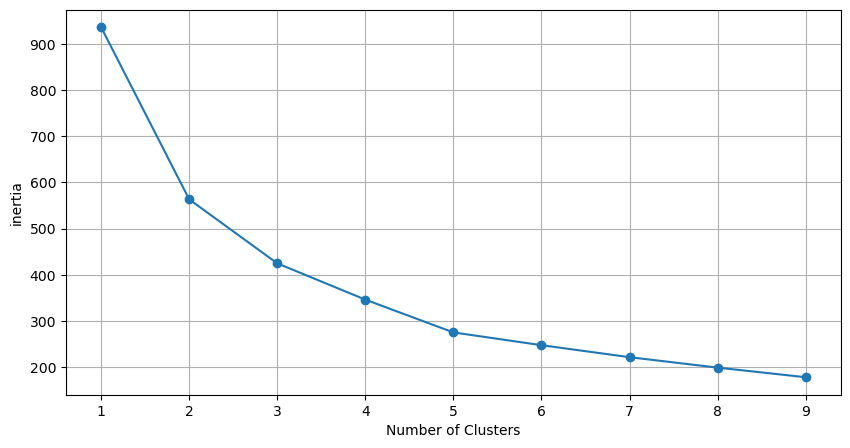

In [10]:
optimise_k_means(df[['ph_T','tds_T', 'no3_T','ec_T','k_T','na_T','mg_T','ca_T','so4_T','cl_T','hco3_T','co3_T']], 10)

In [11]:
kmeans = KMeans(n_clusters=4)

In [12]:
kmeans.fit(df[['ph_T','tds_T','no3_T','ec_T','k_T','na_T','mg_T','ca_T','so4_T','cl_T','hco3_T','co3_T']])

KMeans(n_clusters=4)

In [13]:
df['kmeans_4'] = kmeans.labels_

In [14]:
df

,ost,ostan,code,mahdoodeh,noe#manba,mahal,utmx,utmy,k,na,...,ca_T,so4_T,cl_T,hco3_T,co3_T,no3_T,ph_T,tds_T,ec_T,kmeans_4
0,1,01 تهران,4133,تهران - كرج,1 چاه عميق,رباط کريم نوده,510336,3925833,0.11,9.40,...,-0.486819,0.272054,-0.317114,0.971550,-0.314352,-0.345272,0.531710,0.022575,0.039729,1
1,1,01 تهران,4133,تهران - كرج,1 چاه عميق,وردآورد,513410,3955451,0.21,14.80,...,1.934421,-0.253296,2.469597,-0.948081,-0.314352,-0.345272,-0.428466,1.921077,1.148103,0
2,1,01 تهران,4133,تهران - كرج,1 چاه عميق,قلعه ميرشرکت ده وده,514085,3930104,0.09,4.18,...,-0.119965,-0.266430,-0.362426,0.030804,-0.314352,0.625222,0.810471,-0.371662,-0.351462,1
3,1,01 تهران,4133,تهران - كرج,1 چاه عميق,چيچکلو,517768,3935856,0.09,1.18,...,-0.790086,-0.712977,-0.555004,-0.992575,1.154977,-1.073143,1.429939,-0.751582,-0.755692,2
4,1,01 تهران,4133,تهران - كرج,1 چاه عميق,حسن آبادخالصه,517857,3943620,0.09,2.70,...,-0.878131,-0.525165,-0.509692,-0.871804,3.542637,-0.345272,2.049408,-0.667890,-0.677454,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,646729,3958460,0.08,3.48,...,-1.005307,-0.380693,-0.634301,-0.757389,-0.314352,-0.830519,-0.428466,-0.638157,-0.644855,1
74,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,650846,3959419,0.12,5.40,...,1.102884,0.747496,-0.237817,0.717295,-0.314352,-1.073143,-1.357668,0.589703,0.300523,0
75,1,01 تهران,4706,فيروزكوه,1 چاه عميق,لاسم,652000,3955500,0.12,5.48,...,-0.364534,0.038273,-0.464379,0.526603,-0.314352,-0.587896,-1.047934,-0.041296,-0.175426,1
76,1,01 تهران,4706,فيروزكوه,5 چشمه,فيروزكوه,660185,3957651,0.08,1.39,...,-0.364534,-0.525165,-0.578793,0.513890,-0.314352,-1.073143,-0.428466,-0.590804,-0.592696,1


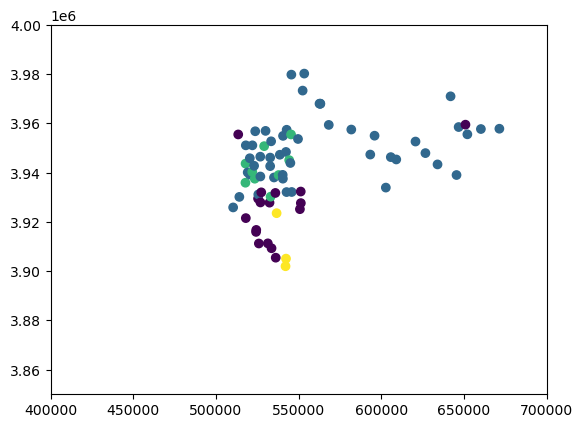

In [15]:
plt.scatter(x=df['utmx'],y=df['utmy'],c=df['kmeans_4'])
plt.xlim(400000,700000)
plt.ylim(3850000,4000000)
plt.show()

In [16]:
for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['ph_T','tds_T','no3_T','ec_T','k_T','na_T','mg_T','ca_T','so4_T','cl_T','hco3_T','co3_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
df

,ost,ostan,code,mahdoodeh,noe#manba,mahal,utmx,utmy,k,na,...,ec_T,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6,KMeans_7,KMeans_8
0,1,01 تهران,4133,تهران - كرج,1 چاه عميق,رباط کريم نوده,510336,3925833,0.11,9.40,...,0.039729,1,0,0,0,1,0,2,1,5
1,1,01 تهران,4133,تهران - كرج,1 چاه عميق,وردآورد,513410,3955451,0.21,14.80,...,1.148103,0,0,1,2,2,1,3,0,0
2,1,01 تهران,4133,تهران - كرج,1 چاه عميق,قلعه ميرشرکت ده وده,514085,3930104,0.09,4.18,...,-0.351462,1,0,0,0,1,0,5,6,6
3,1,01 تهران,4133,تهران - كرج,1 چاه عميق,چيچکلو,517768,3935856,0.09,1.18,...,-0.755692,2,0,0,0,3,4,5,3,6
4,1,01 تهران,4133,تهران - كرج,1 چاه عميق,حسن آبادخالصه,517857,3943620,0.09,2.70,...,-0.677454,2,0,0,0,3,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,646729,3958460,0.08,3.48,...,-0.644855,1,0,0,0,1,3,0,4,1
74,1,01 تهران,4706,فيروزكوه,2 چاه نيمه عميق,طارس,650846,3959419,0.12,5.40,...,0.300523,0,0,1,2,2,1,3,0,0
75,1,01 تهران,4706,فيروزكوه,1 چاه عميق,لاسم,652000,3955500,0.12,5.48,...,-0.175426,1,0,0,0,1,3,2,1,5
76,1,01 تهران,4706,فيروزكوه,5 چشمه,فيروزكوه,660185,3957651,0.08,1.39,...,-0.592696,1,0,0,0,1,3,0,4,1


KeyError: 'KMeans_9'

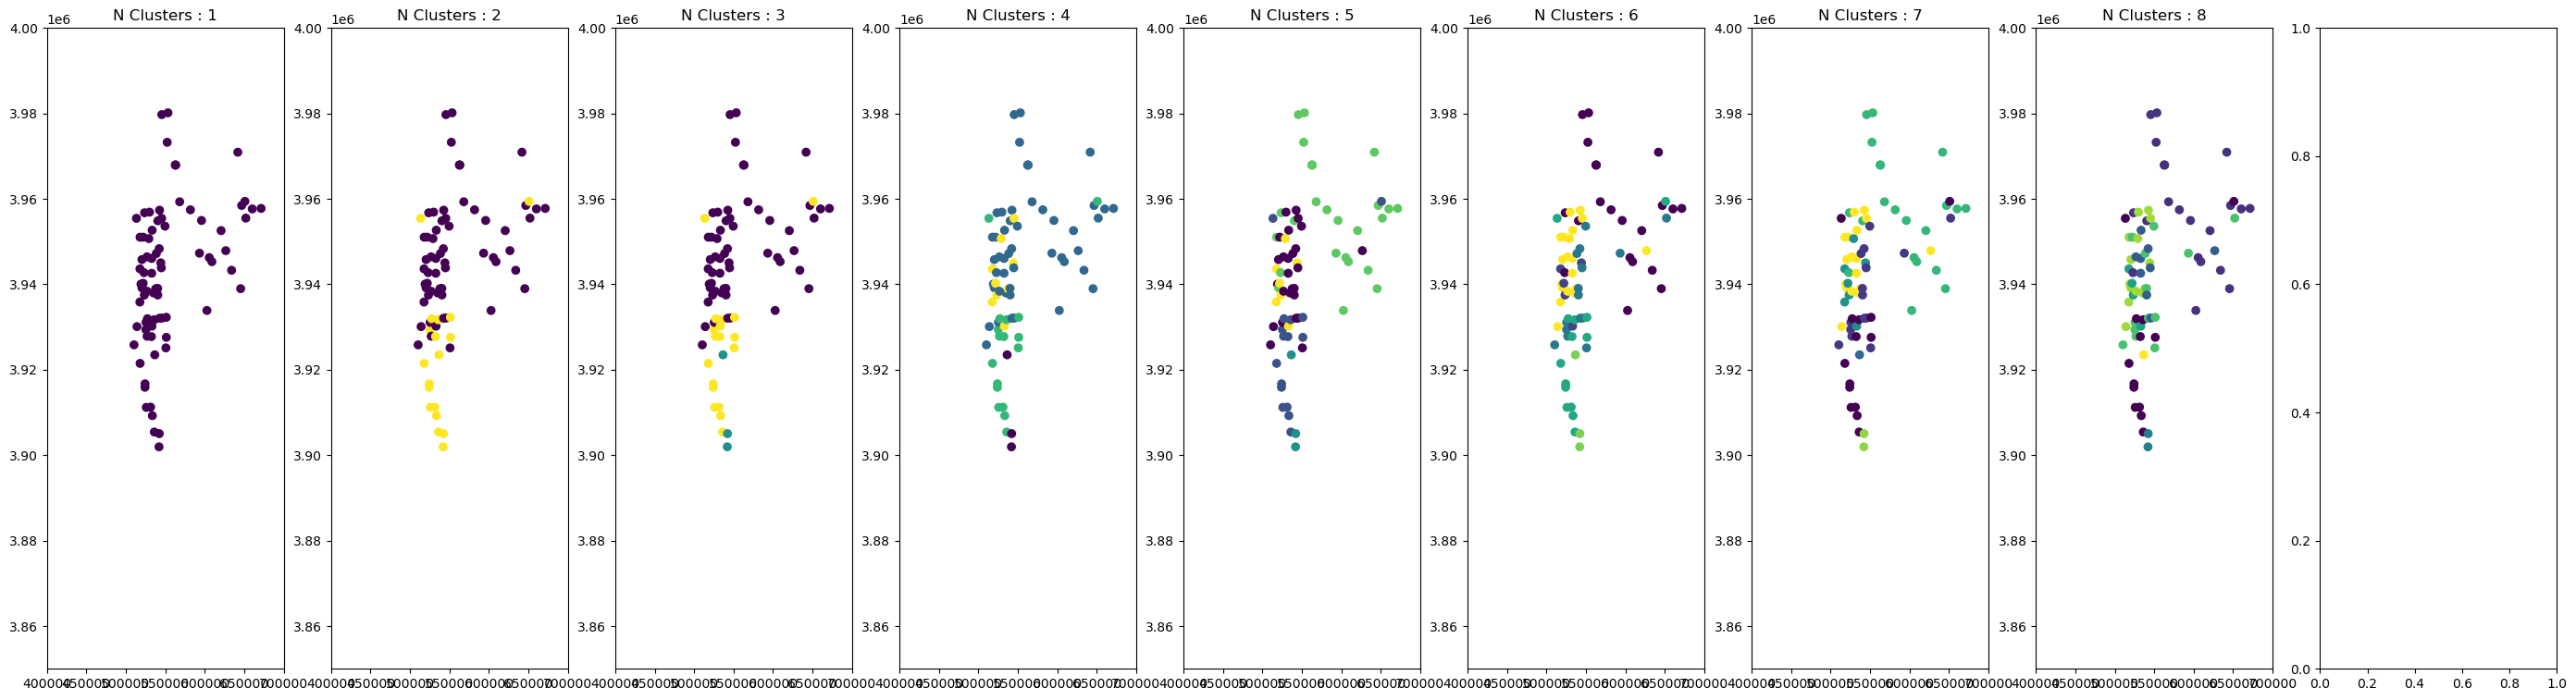

In [18]:
fig, axs=plt.subplots(nrows=1 , ncols=9 , figsize=(35,9))
for i , ax in enumerate(fig.axes , start=1):
    ax.scatter(x=df['utmx'], y = df['utmy'] , c=df[f'KMeans_{i}'])
    ax.set_ylim(3850000,4000000)
    ax.set_xlim(400000,700000)
    ax.set_title(f'N Clusters : {i}')